In [1]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
dataset_path = 'C:/Users/yugan/Downloads/New folder'

In [3]:
img_height, img_width = 224, 224
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(dataset_path,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')


Found 6646 images belonging to 100 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(dataset_path,
                                                         target_size=(img_height, img_width),
                                                         batch_size=batch_size,
                                                         class_mode='categorical',
                                                         subset='validation')


Found 1612 images belonging to 100 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_generator, validation_data=validation_generator, epochs=20)

Epoch 1/20
208/208 [==============================] - 312s 1s/step - loss: 4.5706 - accuracy: 0.0147 - val_loss: 4.4196 - val_accuracy: 0.0298
Epoch 2/20
208/208 [==============================] - 287s 1s/step - loss: 4.1773 - accuracy: 0.0462 - val_loss: 4.0328 - val_accuracy: 0.0757
Epoch 3/20
208/208 [==============================] - 287s 1s/step - loss: 3.7609 - accuracy: 0.1138 - val_loss: 3.7126 - val_accuracy: 0.1135
Epoch 4/20
208/208 [==============================] - 289s 1s/step - loss: 3.3778 - accuracy: 0.1788 - val_loss: 3.5487 - val_accuracy: 0.1594
Epoch 5/20
208/208 [==============================] - 288s 1s/step - loss: 2.9999 - accuracy: 0.2555 - val_loss: 3.4777 - val_accuracy: 0.2004
Epoch 6/20
208/208 [==============================] - 294s 1s/step - loss: 2.6919 - accuracy: 0.3223 - val_loss: 3.2790 - val_accuracy: 0.2177
Epoch 7/20
208/208 [==============================] - 294s 1s/step - loss: 2.3785 - accuracy: 0.3953 - val_loss: 3.1452 - val_accuracy: 0.2574

In [10]:
eval_result = model.evaluate(validation_generator)
print("Validation Loss:", eval_result[0])
print("Validation Accuracy:", eval_result[1])

51/51 [==============================] - 23s 449ms/step - loss: 3.2727 - accuracy: 0.4001
Validation Loss: 3.2726874351501465
Validation Accuracy: 0.40012407302856445


In [11]:
def predict_celebrity(image_path):
    given_img = load_img(image_path, target_size=(img_height, img_width))
    given_img_array = img_to_array(given_img)
    given_img_array = np.expand_dims(given_img_array, axis=0)
    given_img_array /= 255.0
    prediction = model.predict(given_img_array)
    predicted_class = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[predicted_class]
    celebrity_folder = os.path.join(dataset_path, class_label)
    celebrity_images = os.listdir(celebrity_folder)
    celebrity_img_path = os.path.join(celebrity_folder, celebrity_images[0])
    celebrity_img = load_img(celebrity_img_path)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(given_img)
    plt.title("Given Image")

    plt.subplot(1, 2, 2)
    plt.imshow(celebrity_img)
    plt.title("Predicted Celebrity: {}".format(class_label))
    plt.show()

1/1 [==============================] - 0s 95ms/step


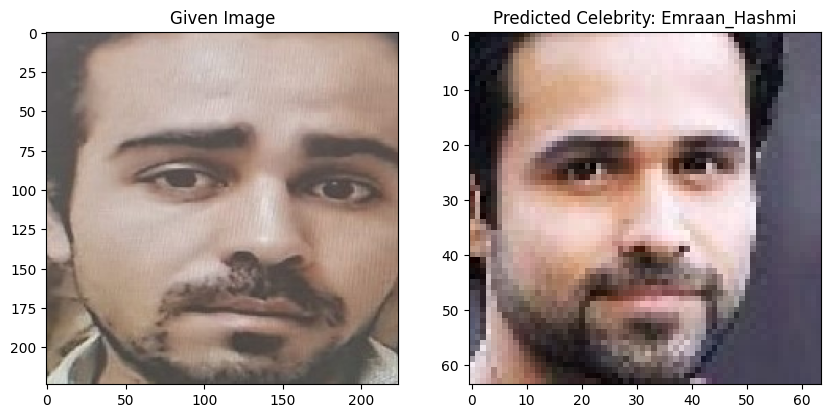

In [33]:
image_path = 'Downloads/WhatsApp Image 2023-12-30 at 10.12.22 PM.jpeg'
predict_celebrity(image_path)